# Initial Exploratory Data Analysis (EDA)

* We do an initial exploratory data analysis for the 2016 USA Elections tweet dataset
* Highlights:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_pickle("../../data/bp_tweets.pkl (1).zip")

## Initial Peek at the Dataset

In [4]:
df.head()

,tweet_id,created_at,entities_hashtags,entities_mentions,place_bounding_box,country,place_country_code,place_full_name,place_id,place_name,...,user_favourites_count,user_followers_count,user_following,user_friends_count,user_location,user_screen_name,user_statuses_count,user_time_zone,user_url,user_verified
0,764039724818272256,Fri Aug 12 10:04:00 +0000 2016,[],"[(10774652, 10774652, [0, 9], TheBlaze, thebla...","([[[-90.433909, 38.606163], [-90.433909, 38.64...",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,...,1708,186,None,446,Miami,DUPUY77,17620,None,http://ggm-dupuy.com,False
1,764039733076897792,Fri Aug 12 10:04:02 +0000 2016,"[([62, 72], NOJUSTICE), ([93, 104], TrumpPence)]","[(813286, 813286, [0, 12], Barack Obama, Barac...","([[[-91.218994, 30.354161], [-91.218994, 30.56...",United States,US,"Baton Rouge, LA",c7ef5f3368b68777,Baton Rouge,...,3850,531,None,677,"Ogletown, DE",redoctapus,5046,Eastern Time (US & Canada),None,False
2,764039769244348417,Fri Aug 12 10:04:10 +0000 2016,[],"[(10774652, 10774652, [0, 9], TheBlaze, thebla...","([[[-90.433909, 38.606163], [-90.433909, 38.64...",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,...,1708,186,None,446,Miami,DUPUY77,17621,None,http://ggm-dupuy.com,False
3,764039812479225856,Fri Aug 12 10:04:21 +0000 2016,[],"[(1339835893, 1339835893, [0, 15], Hillary Cli...","([[[144.593742, -38.433859], [144.593742, -37....",Australia,AU,"Melbourne, Victoria",01864a8a64df9dc4,Melbourne,...,1514,180,None,298,Australia,jjorgi30,2231,Melbourne,None,False
4,764039849850482689,Fri Aug 12 10:04:30 +0000 2016,"[([0, 4], CNN), ([5, 12], newday), ([19, 25], ...",[],"([[[-76.711521, 39.197211], [-76.711521, 39.37...",United States,US,"Baltimore, MD",c0b8e8dc81930292,Baltimore,...,141,2652,None,2976,None,bspence5,92605,None,None,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651063 entries, 0 to 651062
Data columns (total 33 columns):
tweet_id                 651063 non-null int64
created_at               651063 non-null object
entities_hashtags        651063 non-null object
entities_mentions        651063 non-null object
place_bounding_box       651032 non-null object
country                  651032 non-null object
place_country_code       651032 non-null object
place_full_name          651032 non-null object
place_id                 651032 non-null object
place_name               651032 non-null object
place_place_type         651032 non-null object
place_url                651032 non-null object
favorite_count           651063 non-null int64
geo_coordinates          7763 non-null object
geo_type                 7763 non-null object
text                     651063 non-null object
lang                     651063 non-null object
retweet_count            651063 non-null int64
retweeted                651063 

### Missing Data

Some of the features have a lot of missing values:

* geo_coordinates
* geo_type
* user_following

Let's remove them.

In [7]:
df = df.drop(['geo_coordinates', 'geo_type', 'user_following'], axis=1)

# Quantitative Analysis

## Candidate Mentions

We'll create four dummy variables informing if each tweet has a mention to one of the candidates Twitter profile:

* Hillary Clinton - @HillaryClinton
* Bernie Sanders - @BernieSanders
* Ted Cruz - @tedcruz
* Donald Trump - @realDonaldTrump

In [8]:
df['mention_hillary'] = df.text.str.contains('@HillaryClinton').astype(int)
df['mention_ted_cruz'] = df.text.str.contains('@tedcruz').astype(int)
df['mention_bernie_sanders'] = df.text.str.contains('@BernieSanders').astype(int)
df['mention_donald_trump'] = df.text.str.contains('@realDonaldTrump').astype(int)

### Follower Count

Let's look at the distribution for **user_followers_count** for users mentioning Hillary Clinton and Donald Trump.

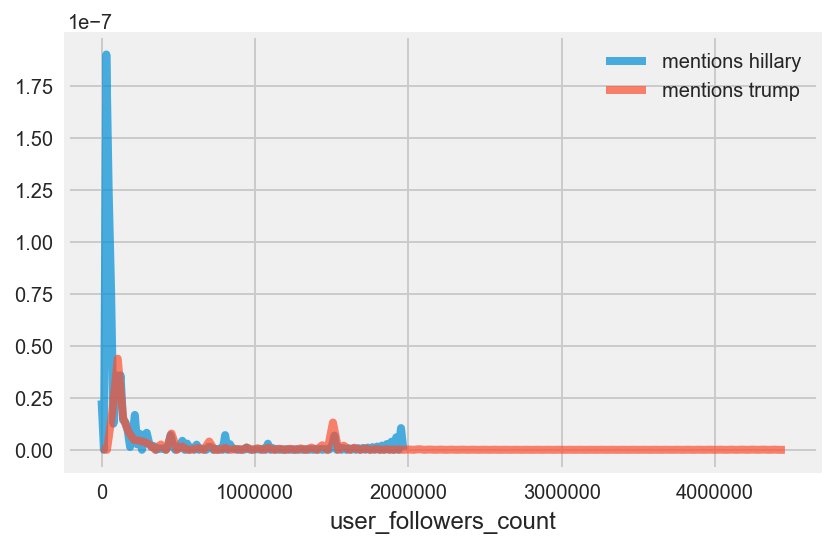

In [9]:
sns.distplot(df[df.mention_hillary == 1].user_followers_count, hist=False, label='mentions hillary', kde_kws={"alpha":0.7})
sns.distplot(df[df.mention_donald_trump == 1].user_followers_count, hist=False, label='mentions trump', kde_kws={"alpha":0.7})

plt.legend()

## Mentions Count

In [10]:
mention_count = df[['mention_hillary', 'mention_donald_trump']].sum()

In [12]:
mention_count

mention_hillary         140034
mention_donald_trump    324064
dtype: int64

([<matplotlib.axis.XTick at 0x1a5c3c2588>,
 <a list of 2 Text xticklabel objects>)

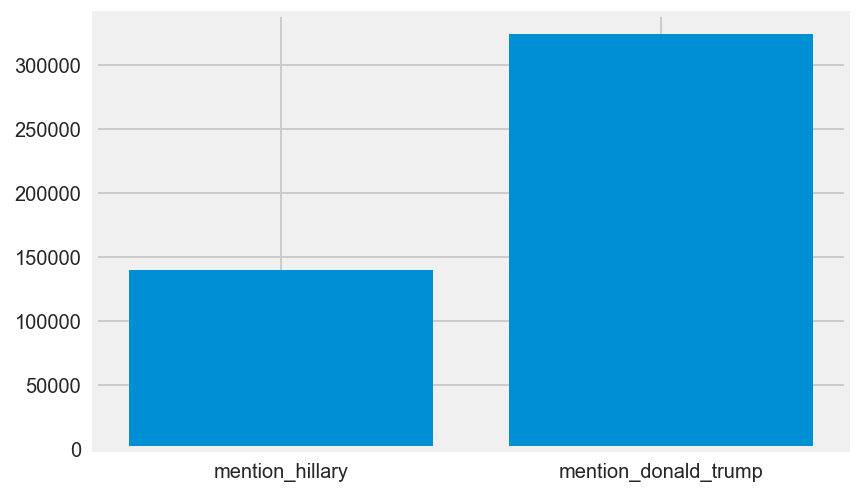

In [11]:
plt.bar(range(0,len(mention_count)), mention_count.values)
        
plt.xticks(range(0,len(mention_count)), mention_count.index)

**Donald Trump** had more than double mentions than **Hillary Clinton**

### Friends Count

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


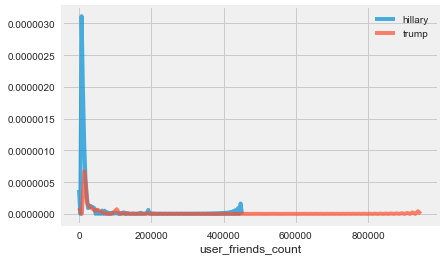

In [38]:
sns.distplot(df[df.mention_hillary == 1].user_friends_count, hist=False, label='hillary', kde_kws={"alpha":0.7})
sns.distplot(df[df.mention_donald_trump == 1].user_friends_count, hist=False, label='trump', kde_kws={"alpha":0.7})

### Top 20 Users Mentioning Hillary

In [18]:
df.groupby('user_screen_name').sum().mention_hillary.sort_values(ascending=False).head(30)

user_screen_name
ofarther           2139.0
chigobiker          910.0
twright55           748.0
terra9441           421.0
misstozak           421.0
KathyPica1          417.0
lbradley71          417.0
buckwinthrop        382.0
casey_holloway      368.0
lindanye6615        364.0
conturyboy1905      331.0
Backhoe44           331.0
harpus88            313.0
Gabsalittle         311.0
8eeccb840d5644a     277.0
zsert7              275.0
GretchenM38         268.0
Trump5254           265.0
DustiHeyZeus        260.0
sandrapatriot       257.0
LizCalcagni         253.0
Debi129             251.0
AnElectofGod        245.0
bettafish52         236.0
luisdhendez         235.0
PoemTrees           235.0
frederickwalser     235.0
Trillion3           234.0
gino_peters         234.0
CliffordSAtton      224.0
Name: mention_hillary, dtype: float64

### Top 20 Users Mentioning Trump

In [19]:
df.groupby('user_screen_name').sum().mention_donald_trump.sort_values(ascending=False).head(30)

user_screen_name
pvtbonehead        2693.0
Unclerojelio       2175.0
Non_MSM_News       2017.0
chigobiker         1647.0
djcaldwelldmd      1617.0
ofarther           1411.0
purdycan           1370.0
MeanProgress       1273.0
SharNeal           1076.0
8richard6           969.0
Verran179           961.0
JamesSzczur         935.0
jackbgoode1         909.0
DUPUY77             835.0
kathryncis          817.0
DSF2020             788.0
moekamerow          767.0
my2bits4u           661.0
RandyJo7159         657.0
michaelhallida4     628.0
Kegan05             615.0
pjmcgovern4         578.0
karalara29          551.0
frederickwalser     532.0
cleared37Joseph     524.0
rendale             523.0
ikassemdallas       509.0
Trump5254           485.0
Debi129             482.0
HEINSLERJAN         445.0
Name: mention_donald_trump, dtype: float64

## Time Series Analysis: Absolute

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'])

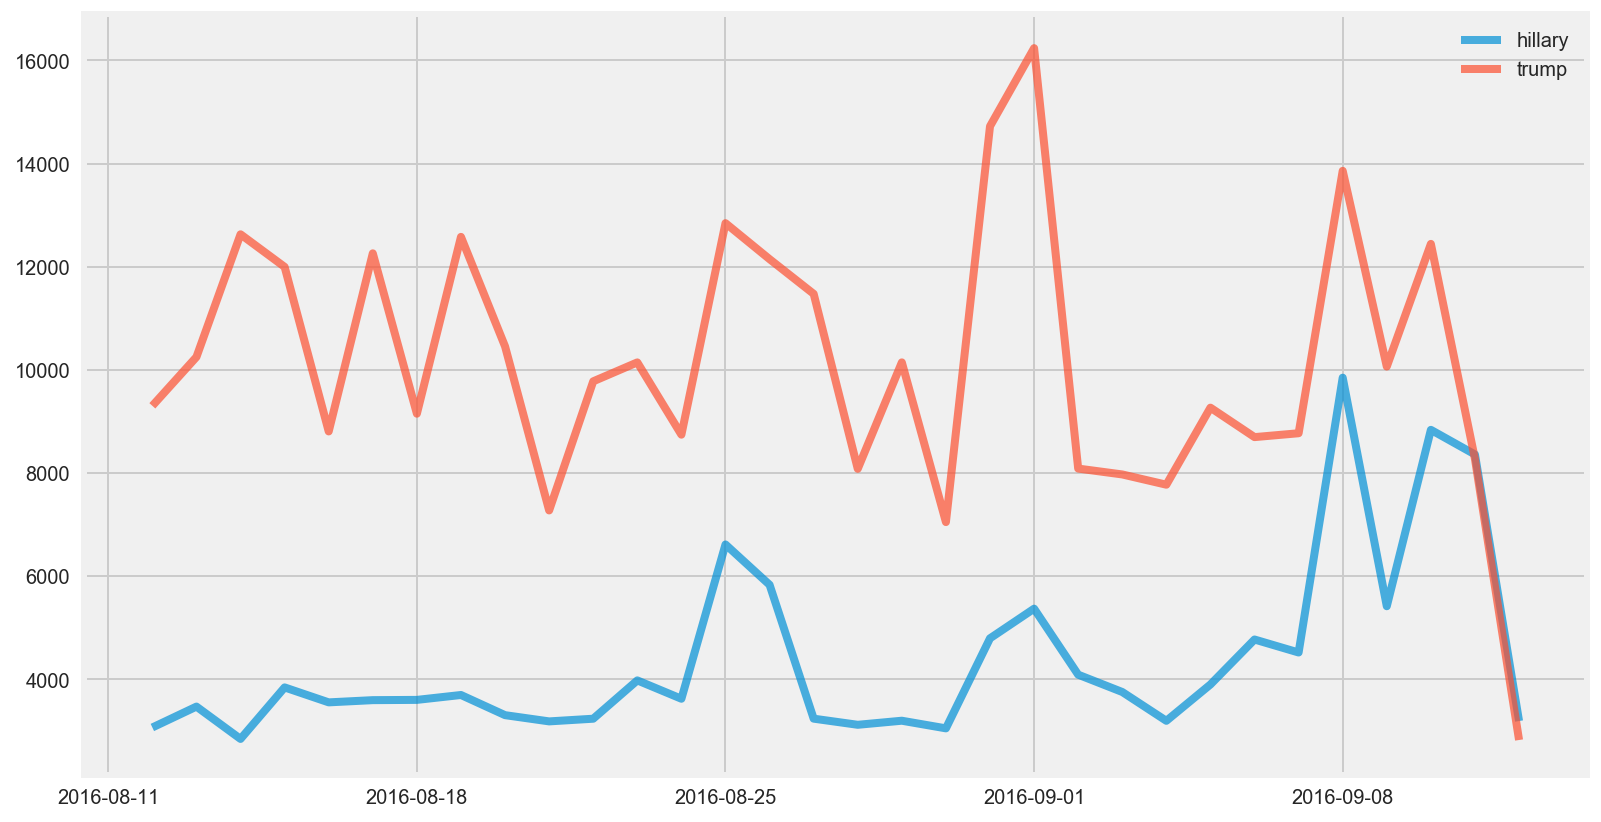

In [21]:
plt.figure(figsize=(12,7))

plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').sum().mention_hillary, label='hillary', alpha=0.7)
plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').sum().mention_donald_trump, label='trump', alpha=0.7)

plt.legend()

## Time Series Analysis: Relative

In [1]:
plt.figure(figsize=(12,7))

plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').mean().mention_hillary, label='hillary', alpha=0.7)
plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').mean().mention_donald_trump, label='trump', alpha=0.7)

plt.legend()

NameError: name 'plt' is not defined

## Separating the Dataset Geographically

Obviously US is the most represented country within the dataset. Let's break the dataset into two datasets and analyze accordingly:

* USA
* World

In [57]:
df_usa = df[df.place_country_code == 'US']
df_world = df[df.place_country_code != 'US']

### Except from USA, which countries have more tweets?

In [62]:
top_20_countries = df_world.groupby('place_country_code').count().tweet_id.sort_values(ascending=False).head(20)

In [65]:
top_20_countries.values

array([17249, 10293,  8637,  2613,  1625,  1448,  1293,  1039,   921,
         904,   902,   849,   804,   767,   732,   633,   534,   507,
         498,   480])

([<matplotlib.axis.XTick at 0x1aa1c90b38>,
 <a list of 20 Text xticklabel objects>)

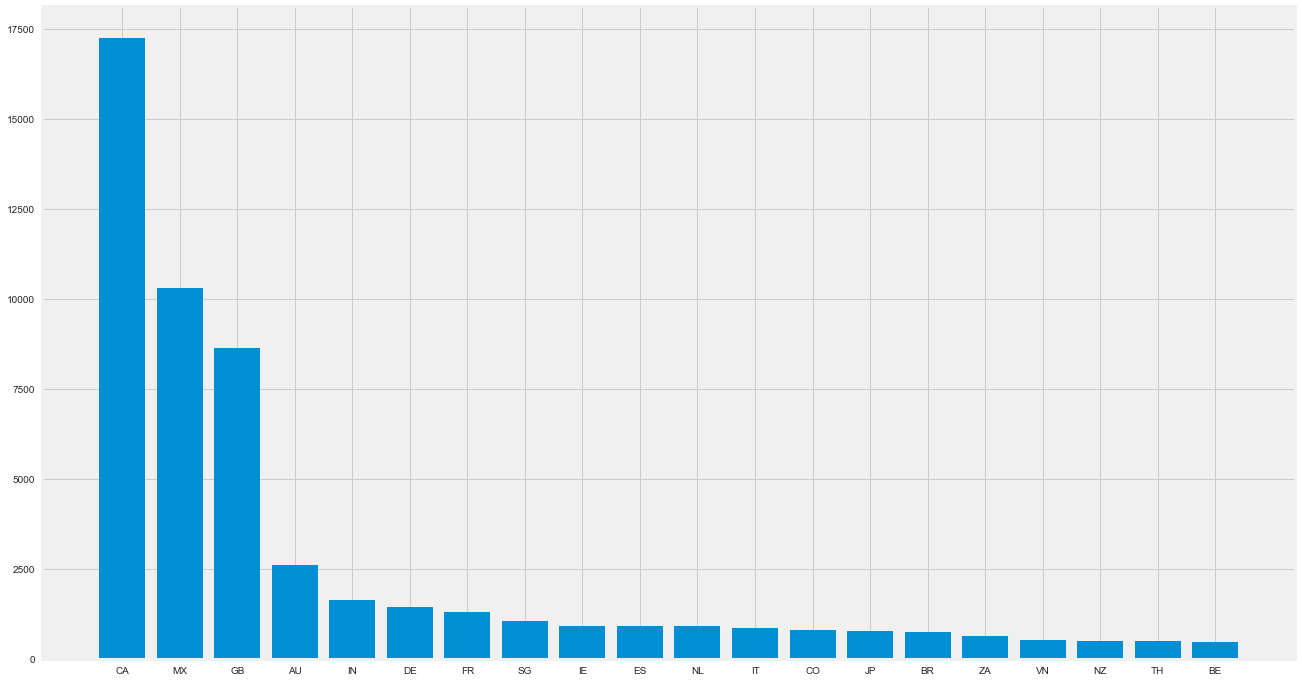

In [73]:
plt.figure(figsize=(20,12))

plt.bar(range(0,len(top_20_countries)), top_20_countries.values)

plt.xticks(range(0,len(top_20_countries)), top_20_countries.index)

## Most Represented Countries

The for most tweeting countries are:

* Canada
* Mexico
* Great Britain
* Australia

In [46]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Qualitative Analysis

### TODO